# Выбор локации для скважины

**Объект: Добывающая компания.** 

**Цель:** Решить, где бурить новую скважину.

**Задача:** Построить модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль.

**Данные:** Пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов.

**План:** 
- В избранном регионе поиск месторождения, определеие значения признаков.
- Построение модели и оценка объёма запасов.
- Выбор месторождения с самым высокими оценками значений. 
- Оценка суммарной прибыли отобранных месторождений.

**Описание данных:**
- id — уникальный идентификатор скважины.
- f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы).
- product — объём запасов в скважине (тыс. баррелей).

**Условия задачи:**
- Использование линейной регрессии.
- Исследование 500 точек, для машинного обучение - 200 лучших для разработки.
- Бюджет на разработку скважин в регионе — 10 млрд рублей.
- Один баррель сырья - 450 рублей дохода. 
- Доход с каждой единицы продукта составляет 450 тыс. рублей.
- Вероятность убытков не больше 2,5%. 

## Загрузка и подготовка данных

In [1]:
# Загрузим необходимые бибилиотеки, функции
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")
from scipy import stats as st
from IPython.display import display
from sklearn.metrics import mean_squared_error
from numpy.random import RandomState

In [2]:
# Загрузим данные

data_0 = pd.read_csv('/datasets/geo_data_0.csv')
data_1 = pd.read_csv('/datasets/geo_data_1.csv')
data_2 = pd.read_csv('/datasets/geo_data_2.csv')

Посмотрим содержание, основную информацию по кол-ву и типам данных, пропускам.

In [3]:
display(data_0.head())
display(data_1.head())
display(data_2.head())

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [4]:
display(data_0.info())
display(data_1.info())
display(data_2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

In [5]:
display(data_0.describe())
display(data_1.describe())
display(data_2.describe())

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


Удалим столбец с ID, тип объект. Для моделей и расчета прибыли он не потребуется, будет достаточно индексов.

In [6]:
data_0.drop(['id'], axis='columns', inplace=True)

In [7]:
data_1.drop(['id'], axis='columns', inplace=True)

In [8]:
data_2.drop(['id'], axis='columns', inplace=True)

По статистическим данным - средние близки к медианам, выбросов в целом нет. Посмотрим корреляцию признаков.

In [9]:
data_0.corr()

,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


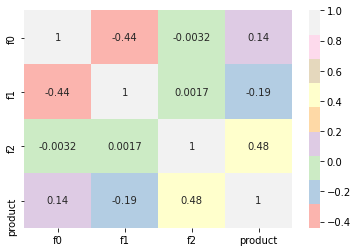

In [10]:
data_0_plot = sns.heatmap(data_0.corr(), cmap="Pastel1", annot=True)
plt.show()

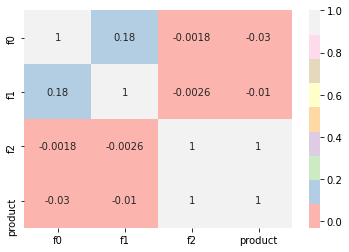

In [11]:
data_1_plot = sns.heatmap(data_1.corr(), cmap="Pastel1", annot=True)
plt.show()

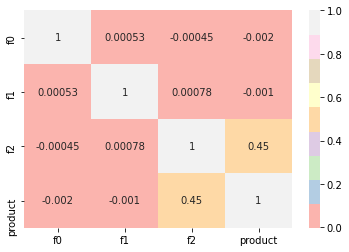

In [12]:
data_2_plot = sns.heatmap(data_2.corr(), cmap="Pastel1", annot=True)
plt.show()

Заметна высокая корреляция между признаком f2 и целевым признаком в третьем регионе (2). Будем использовать линейную модель, поэтому оставим зависимость.

В дальнейшем по нашим данным: data_0 - Регион № 1, data_1 - Регион № 2, data_2 - Регион № 2.

## Обучение и проверка модели

Обучим и проверим модель для каждого региона. Для этого разделим данные на обучающую и валидационную выборки в соотношении 75:25. После обучения модели выведем средний запас предсказанного сырья и RMSE модели.

In [13]:
# Обучение модели
def linear_regression(data):
    # зададим целевой признак и подготовим данные
    target = data['product']
    features = data.drop(['product'], axis=1)
    
    # Разбьём данные на выборки 
    features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345)
    
    # Обучим модель
    model = LinearRegression()
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    
    rmse = mean_squared_error(target_valid, predicted_valid)**0.5
    
    # Средний запас сырья
    predicted_valid_mean = predicted_valid.sum()/len(predicted_valid)
    
    return target_valid, predicted_valid, rmse, predicted_valid_mean

In [14]:
target_valid_0, predicted_valid_0, rmse_0, predicted_valid_mean_0 = linear_regression(data_0)
target_valid_1, predicted_valid_1, rmse_1, predicted_valid_mean_1 = linear_regression(data_1)
target_valid_2, predicted_valid_2, rmse_2, predicted_valid_mean_2 = linear_regression(data_2)

In [15]:
print('Регион_0. Средний запас, тыс.бар:', predicted_valid_mean_0, 'rmse:', rmse_0)
print('Регион_1. Средний запас, тыс.бар:', predicted_valid_mean_1, 'rmse:', rmse_1)
print('Регион_2. Средний запас, тыс.бар:', predicted_valid_mean_2, 'rmse:', rmse_2)

Регион_0. Средний запас, тыс.бар: 92.59256778438035 rmse: 37.5794217150813
Регион_1. Средний запас, тыс.бар: 68.728546895446 rmse: 0.893099286775617
Регион_2. Средний запас, тыс.бар: 94.96504596800489 rmse: 40.02970873393434


Итак, чем ближе корень из средней квадратичной ошибки (RMSE) к нулю тем лучше. В нашем случае значение RMSE модели по 2 региону является самым низким. В целом лучшие предсказания по региону.  Предсказания по средним запасам в новых скважинах сырья 92/68 и 94 тыс.бар.

## Подготовка к расчёту прибыли

Все ключевые значения для расчётов сохраним в отдельных переменных

In [16]:
reg_budget = 10*10**9 # Бюджет на разработку скважин в регионе
barrel_profit = 450  # Доход с одного барреля сырья 
profit_product_unit = 450 * 10**3 # Доход с каждой единицы продукта
total_sampling_points = 500 # Исследование 500 точек
sampling_points = 200 # Количество лучших скважин для расчета
loss_probability = 0.025 # Максимальная вероятность убытков
bootstrap_samples = 1000

Рассчитаем достаточный объем сырья для безубыточной разработки новой скважины. Для этого вычислим количество в тыс. баррелей для покрытия затрат на одну скважину (разделим весь бюджет на доход и кол-во лучших скважин)

In [17]:
present_materials_min = reg_budget/profit_product_unit/sampling_points
print(f'Достаточный объём сырья для безубыточной разработки {int(present_materials_min)}(тыс. бар.)')

Достаточный объём сырья для безубыточной разработки 111(тыс. бар.)


Рассчитаем среднее значение запасов во всех трех регионах для разработки без убытков.

In [18]:
print('Регион_0. Достаточный объем сырья:', predicted_valid_mean_0 - present_materials_min)
print('Регион_1. Достаточный объем сырья:', predicted_valid_mean_1 - present_materials_min)
print('Регион_2. Достаточный объем сырья:', predicted_valid_mean_2 - present_materials_min)

Регион_0. Достаточный объем сырья: -18.518543326730764
Регион_1. Достаточный объем сырья: -42.38256421566511
Регион_2. Достаточный объем сырья: -16.146065143106227


Среднее значение запасов во всех трех регионах меньше необходимого количества для безубыточной разработки.
Ближе всего к необходимому количеству предсказанные запасы в регионе 3. Меньше всего предсказанных запасов в регионе - 2. (Т.е 1 регион на 18.5, 2 - на 42.3, 3 - на 16.1 тыс. баррелей). Посмотрим далее по прибыли.

## Расчёт прибыли по выбранным скважинам и предсказаниям модели

Для начала приведем данные к необходимому типу, выберем скважины, рассчитаем прибуль для максимальных по предсказаниям 

In [19]:
# к типу Series
def series_type(target_valid, predicted_valid):
    target_valid = target_valid.reset_index(drop=True)
    predicted_valid = pd.Series(predicted_valid)
    return target_valid, predicted_valid

In [20]:
target_valid_0, predicted_valid_0 = series_type(target_valid_0, predicted_valid_0)
target_valid_1, predicted_valid_1 = series_type(target_valid_1, predicted_valid_1)
target_valid_2, predicted_valid_2 = series_type(target_valid_2, predicted_valid_2)

Выберм скважины с максимальными значениями предсказаний (200) лучших скважин. Рассчитаем прибыль по моделям по каждой скважине с объемом.

In [21]:
def income_cost(target_valid, predicted_valid):
    prob_sort = predicted_valid.sort_values(ascending=False).head(200) # сортируем и выбираем с максимальным объемом
    target_choice = target_valid.reset_index(drop=True)[prob_sort.index] 
    income = target_choice.sum() * profit_product_unit # доход с 200 скважин
    return income

In [22]:
print('Прибыль по предсказаниям модели скважин составит:')
print('для региона 1 - {:.1f} руб.'.format(income_cost(target_valid_0, predicted_valid_0) - reg_budget))
print('для региона 2 - {:.1f} руб.'.format(income_cost(target_valid_1, predicted_valid_1) - reg_budget))
print('для региона 3 - {:.1f} руб.'.format(income_cost(target_valid_2, predicted_valid_2) - reg_budget))

Прибыль по предсказаниям модели скважин составит:
для региона 1 - 3320826043.1 руб.
для региона 2 - 2415086696.7 руб.
для региона 3 - 2710349963.6 руб.


Достаточно высокие значения прибыли для регионов по полученному сырью. Как следствие, слишком высокие затраты. У нас же для исследования только 500 точек.

## Риски и прибыль для каждого региона

Пересчитаем и применим Bootstrap с 1000 выборок, чтобы найти распределение всей прибыли. Из распределения выведем среднюю выручку для региона, доверительный интервал и вероятность риска (минус прибыль).

In [23]:
def total_income(target_valid, predicted_valid, count, profit_product_unit, reg_budget):
    prob_sort = predicted_valid.sort_values(ascending=False)
    selected = target_valid[prob_sort.index][:count]
    return int(profit_product_unit * selected.sum() - reg_budget)

In [24]:
def bootstrap(target_valid, predicted_valid, count, profit_product_unit, reg_budget):
    state = RandomState(12345)
    values = []
    for i in range(1000):
        target_subsample = target_valid.sample(n = total_sampling_points, replace=True, random_state=state)
        pred_subsumple = predicted_valid[target_subsample.index]

        values.append(total_income(target_subsample, pred_subsumple, sampling_points, profit_product_unit, reg_budget))
    values = pd.Series(values)
    values_mean = int(values.mean())
    lower = int(values.quantile(q=0.025))
    upper = int(values.quantile(q=0.975))
    risk = int(len(values[values < 0]) / len(values) * 100)
    return values_mean, lower, upper, risk

In [25]:
values_mean_0, lower_0, upper_0, risk_0  = bootstrap(target_valid_0, predicted_valid_0, sampling_points, profit_product_unit, reg_budget)

In [26]:
print('Средняя прибыль по региону №1:', values_mean_0)
print('95% доверительный интервал 200 лучших скважин региона №1 от', lower_0,'до', upper_0)
print('Риск убытков региона №1:', risk_0, '%')

Средняя прибыль по региону №1: 425938526
95% доверительный интервал 200 лучших скважин региона №1 от -102090093 до 947976352
Риск убытков региона №1: 6 %


In [27]:
values_mean_1, lower_1, upper_1, risk_1  = bootstrap(target_valid_1, predicted_valid_1, sampling_points, profit_product_unit, reg_budget)

In [28]:
print('Средняя прибыль по региону №2:', values_mean_1)
print('95% доверительный интервал 200 лучших скважин региона №2 от', lower_1,'до', upper_1)
print('Риск убытков региона №2:', risk_1, '%')

Средняя прибыль по региону №2: 515222772
95% доверительный интервал 200 лучших скважин региона №2 от 68873225 до 931547590
Риск убытков региона №2: 1 %


In [29]:
values_mean_2, lower_2, upper_2, risk_2  = bootstrap(target_valid_2, predicted_valid_2, sampling_points, profit_product_unit, reg_budget)

In [30]:
print('Средняя прибыль по региону №3:', values_mean_2)
print('95% доверительный интервал 200 лучших скважин региона №3 от', lower_2,'до', upper_2)
print('Риск убытков региона №3:', risk_2, '%')

Средняя прибыль по региону №3: 435008362
95% доверительный интервал 200 лучших скважин региона №3 от -128880546 до 969706953
Риск убытков региона №3: 6 %


Вывод

Итак, в рамках проекта проанализированы данные, обучена модель и подготовлен прогноз запасов для скважин трёх регионов.
- Рассчитаны средние запасы сырья по регионам и значения RMSE модели: по 2 региону он является самым низким. В целом лучшие предсказания по региону. Предсказания по средним запасам в новых скважинах сырья 92/68 и 94 тыс.бар.
- Согласно расчитанной средней выручке все три региона являются прибыльными. Регион №1 - 426 млн. рублей, регион №2 - 515 млн. рублей, регион №3 - 435 млн. рублей.
- Регион №1 и №3 обладают очень высокой вероятностью убытков (по 6%). В нашем случае вероятность убытков должна быть меньше 2,5 %, левая граница дов. интервала также отрицательная.
- Таким образом, лучший регион по показателям - №2. Там добыча принесёт наибольшую прибыль, этот регион для разработки месторождения может быть предложен.